In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [2]:
data  = pd.read_csv('day.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
data.shape

(730, 16)

## **EXPLORATORY DATA ANALYSIS**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# We can simply drop the columns  -' 'casual' and 'registered', as they are redundant. Our target variable is 'cnt'
# Column 'instant' can also be safely dropped as it is just the record number.
data = data.drop(columns = ["casual","registered",'instant'])

In [6]:
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [7]:
data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [8]:
data.shape

(730, 13)

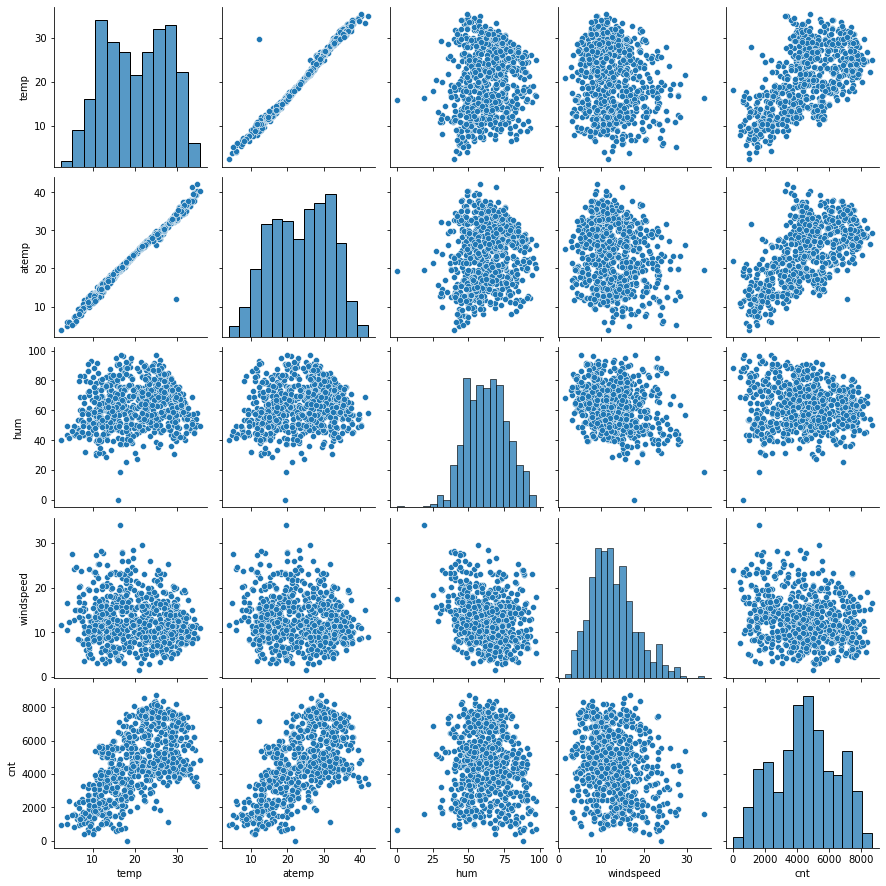

In [9]:
# Checking if Linear Regression model would be an appropriate choice
sns.pairplot(data = data, vars = ['temp','atemp','hum','windspeed','cnt'])

1. There seems to be a linear relationship between 'cnt' and 'temp'. So, we can go ahead with a Linear Reg model.
2. 'temp' and 'atemp' are highly positively correlated so, we can keep just one of them. Keeping 'atemp' as it is more realistic. 

In [10]:
data = data.drop('temp',axis = 1)

In accordance with the Data dictionary, columns 'holiday' and 'workingday' provide redundant information. Keeping 'workingday' as it covers holiday, weekend and working day.

In [11]:
data = data.drop('holiday',axis = 1)

In [12]:
data.head()

,dteday,season,yr,mnth,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,6,0,2,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,2,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,1,1,1,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,2,1,1,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,3,1,1,11.46350,43.6957,12.522300,1600


In [13]:
data.head()

,dteday,season,yr,mnth,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,6,0,2,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,2,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,1,1,1,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,2,1,1,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,3,1,1,11.46350,43.6957,12.522300,1600


### **Handling Outliers**

<AxesSubplot:xlabel='cnt'>

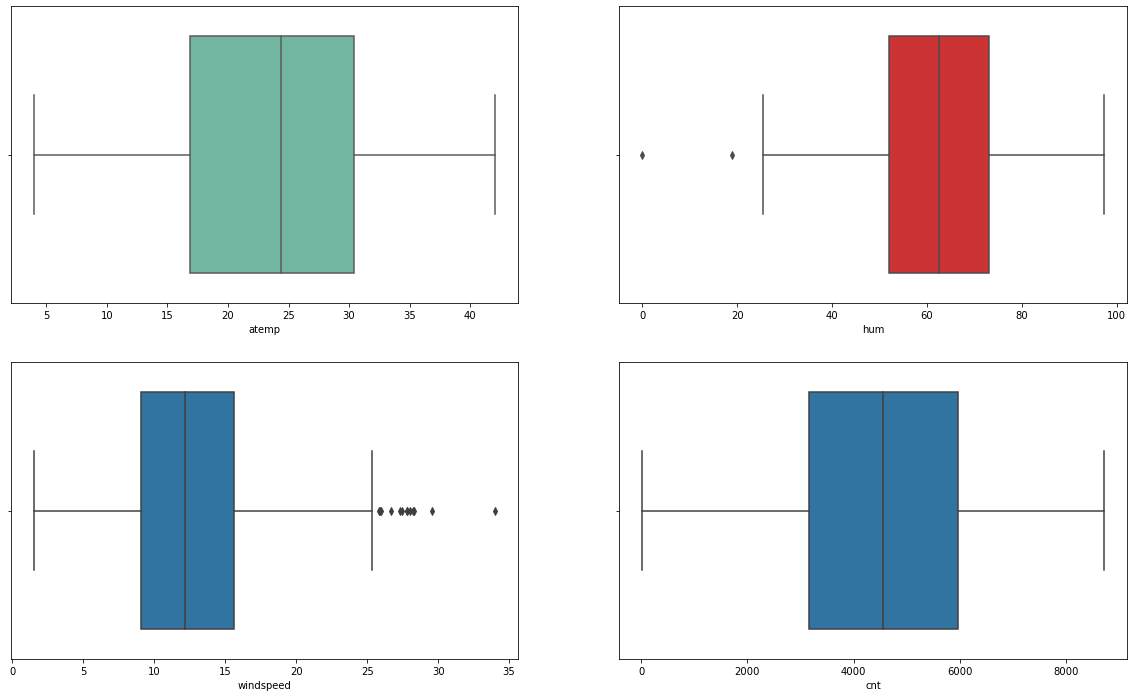

In [14]:
# Checking for outliers in numeric columns
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(data['atemp'],palette="Set2")
plt.subplot(2,2,2)
sns.boxplot(data['hum'],palette="Set1")
plt.subplot(2,2,3)
sns.boxplot(data['windspeed'])
plt.subplot(2,2,4)
sns.boxplot(data['cnt'])

In [15]:
data[data['hum']<=20]

,dteday,season,yr,mnth,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
49,19-02-2018,1,0,2,6,0,1,19.5702,18.7917,34.000021,1635
68,10-03-2018,1,0,3,4,1,3,19.2834,0.0000,17.545759,623


In [16]:
data[data['windspeed']>25]

,dteday,season,yr,mnth,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
44,14-02-2018,1,0,2,1,1,1,19.91750,37.5833,27.999836,1913
49,19-02-2018,1,0,2,6,0,1,19.57020,18.7917,34.000021,1635
93,04-04-2018,2,0,4,1,1,1,27.14645,42.6250,25.833257,3115
94,05-04-2018,2,0,4,2,1,2,19.91750,64.2083,26.000489,1795
238,27-08-2018,3,0,8,6,0,2,31.77780,85.0000,25.166339,1115
292,20-10-2018,4,0,10,4,1,1,23.32625,63.6250,28.292425,4195
377,13-01-2019,1,1,1,5,1,1,12.46810,50.7500,25.333236,3214
382,18-01-2019,1,1,1,3,1,1,13.76270,44.3333,27.833743,3376
407,12-02-2019,1,1,2,0,0,1,5.08290,46.4583,27.417204,1529
420,25-02-2019,1,1,2,6,0,1,12.78375,39.5833,28.250014,2732


In [17]:
# Treating the outliers in 'hum' and 'windspeed' columns
def outlier(x):
    Q1=x.quantile(0.25)
    Q3=x.quantile(0.75)
    IQR=Q3-Q1  
    Lower_Whisker = Q1-1.5*IQR
    Upper_Whisker = Q3+1.5*IQR
    print (f"Lower_Whisker = {Lower_Whisker}")
    print (f"Upper_Whisker = {Upper_Whisker}")



In [18]:
outlier(data['hum'])

Lower_Whisker = 20.515637499999997
Upper_Whisker = 104.4739375


In [19]:
data['hum']= data['hum'].apply(lambda x: 20.515 if x<=20.515 else x)

In [20]:
outlier(data['windspeed'])

Lower_Whisker = -0.8342588749999997
Upper_Whisker = 25.501498125


In [21]:
data['windspeed']= data['windspeed'].apply(lambda x: 25.501 if x>=25.501 else x)

<AxesSubplot:xlabel='windspeed'>

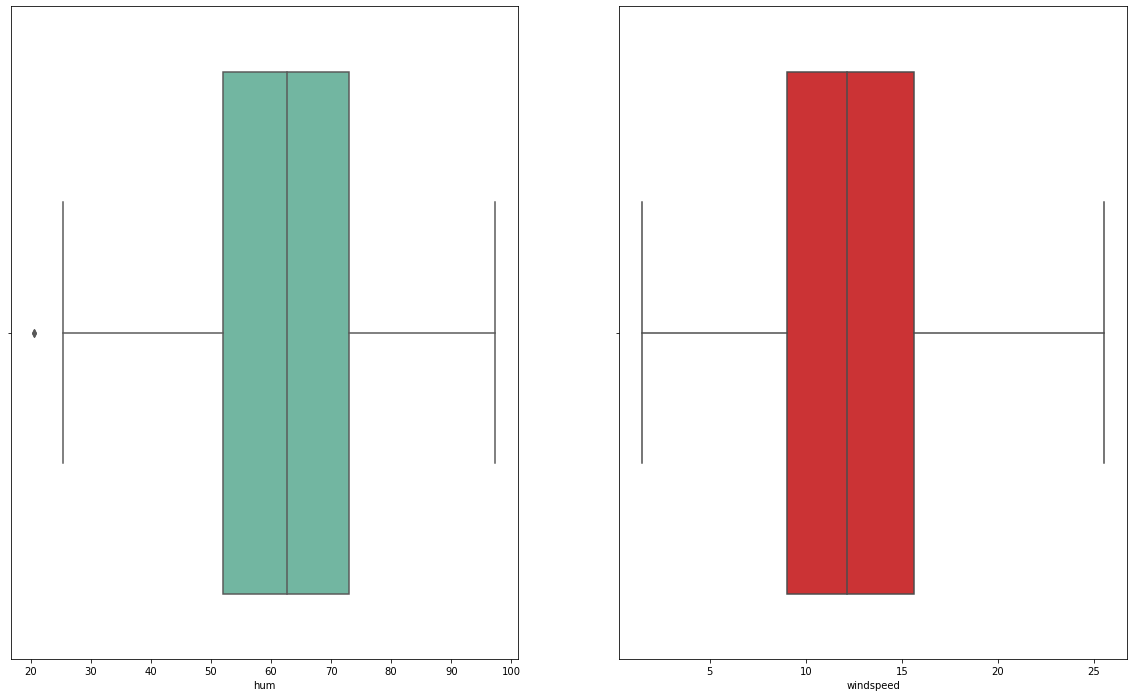

In [22]:
# Rechecking for outliers
plt.figure(figsize=(20, 12))
plt.subplot(1,2,1)
sns.boxplot(data['hum'],palette="Set2")
plt.subplot(1,2,2)
sns.boxplot(data['windspeed'],palette="Set1")

<AxesSubplot:>

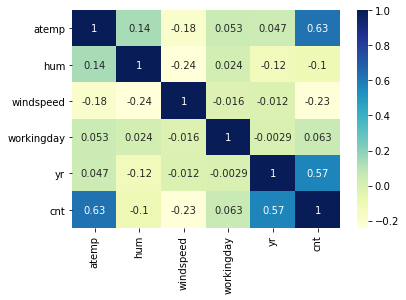

In [23]:
# Checking for correlations through Heatmap
data1 = data[['atemp','hum','windspeed','workingday','yr','cnt']]
sns.heatmap(data1.corr(),annot = True, cmap = 'YlGnBu')

### **Visualizing Categorical columns**

([<matplotlib.axis.XTick at 0x214ad718d90>,
 [Text(0, 0, '1:spring'),
  Text(1, 0, '2:summer'),
  Text(2, 0, '3:fall'),
  Text(3, 0, '4:winter')])

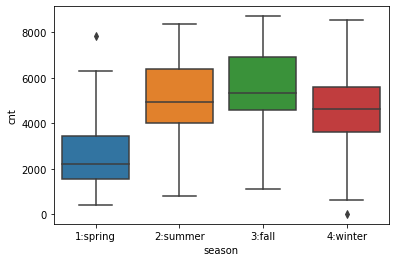

In [24]:
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.xticks(range(0,4),labels = ["1:spring","2:summer","3:fall","4:winter"])

Demand varies with season.<br>
Highest demand is in fall season <br>
Lowest demand is in spring season

([<matplotlib.axis.XTick at 0x214ad7b0fd0>,
 [Text(0, 0, '0:2018'), Text(1, 0, '1:2019')])

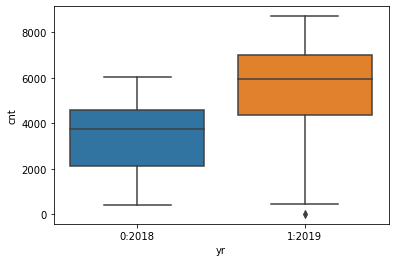

In [25]:
sns.boxplot(x = 'yr', y = 'cnt', data = data)
plt.xticks(range(0,2),labels = ["0:2018","1:2019"])

The chart shows steep increase in demand from year 2018 to 2019.

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

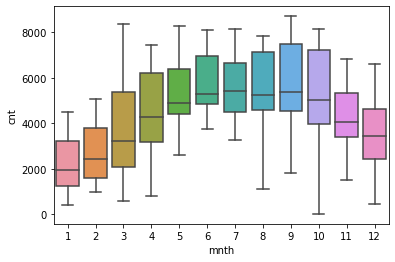

In [26]:
sns.boxplot(x = 'mnth', y = 'cnt', data = data)

([<matplotlib.axis.XTick at 0x214ad968af0>,
 [Text(0, 0, '0:non-working day'), Text(1, 0, '1:working day')])

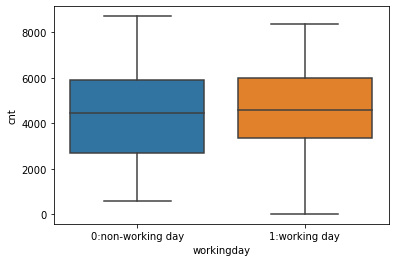

In [27]:
sns.boxplot(x = 'workingday', y = 'cnt', data = data)
plt.xticks(range(0,2),labels = ["0:non-working day","1:working day"])

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

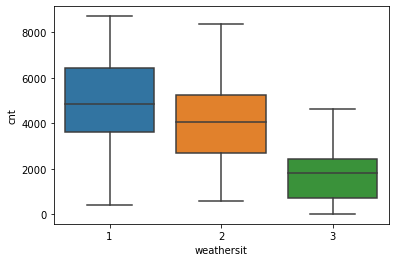

In [28]:
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)

1: Clear, Few clouds, Partly cloudy, Partly cloudy <br>
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
Maximum demand in category 1

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

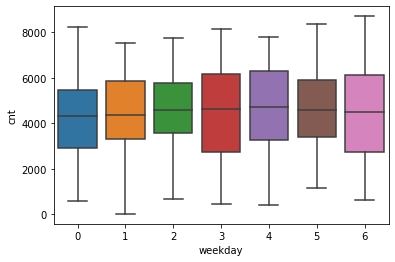

In [29]:
sns.boxplot(x = 'weekday', y = 'cnt', data = data)

It was a monday on 01-01-2018 ; the value given as 6. Going by that, 0 - Tuesday.<br>
Median demand is more or less same for all days of the week

<Figure size 1440x720 with 0 Axes>

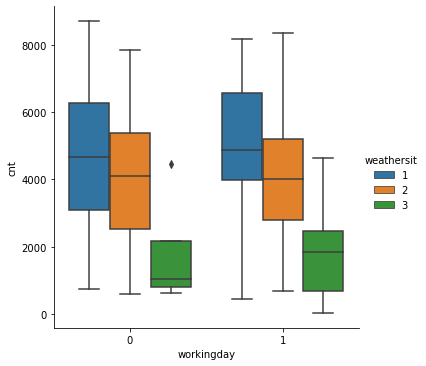

In [30]:
plt.figure(figsize = (20,10))
sns.catplot(data =data,y ='cnt', x ='workingday', hue ='weathersit',kind = 'box')

<Figure size 1440x720 with 0 Axes>

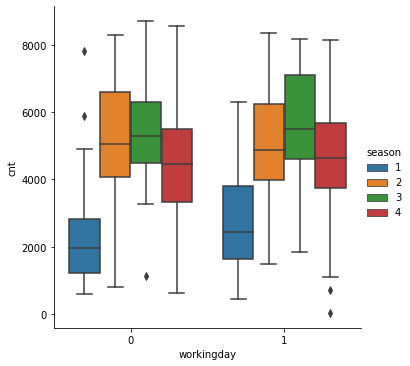

In [31]:
plt.figure(figsize = (20,10))
sns.catplot(data =data,y ='cnt', x ='workingday', hue ='season',kind = 'box')

In [32]:
# Relevant details are available as 'yr', 'mnth' variables, so dropping 'dteday' column
data = data.drop('dteday',axis = 1)

## **DATA PRE-PROCESSING**

In [33]:
data.describe()

,season,yr,mnth,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,2.997260,0.683562,1.394521,23.726322,62.795638,12.720652,4508.006849
std,1.110184,0.500343,3.450215,2.006161,0.465405,0.544807,8.150308,14.126179,5.071544,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.953480,20.515000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,1.000000,0.000000,1.000000,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,3.000000,1.000000,1.000000,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,5.000000,1.000000,2.000000,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,6.000000,1.000000,3.000000,42.044800,97.250000,25.501000,8714.000000


-  Variable 'workingday'  is already dummy encoded.<br>
   We need to do the same for variables - season, week, mnth, weekday, weathersit

In [34]:
# Changing the datatype of categoric variables to object
data['season'] = data['season'].astype(object)
data['mnth'] = data['mnth'].astype(object)
data['weekday'] = data['weekday'].astype(object)
data['weathersit'] = data['weathersit'].astype(object)

In [35]:
data.describe()

,yr,workingday,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.683562,23.726322,62.795638,12.720652,4508.006849
std,0.500343,0.465405,8.150308,14.126179,5.071544,1936.011647
min,0.000000,0.000000,3.953480,20.515000,1.500244,22.000000
25%,0.000000,0.000000,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,1.000000,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,1.000000,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,42.044800,97.250000,25.501000,8714.000000


In [36]:
# Dummy encoding 'season'
season = pd.get_dummies(data = data['season'],drop_first=True,dtype = int)

In [37]:
season.rename(columns={1:'spring',2: "summer", 3: "fall",4:'winter'},inplace=True)
season.head()

,summer,fall,winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [38]:
data = pd.concat([data, season], axis = 1)

In [39]:
data.drop(['season'], axis = 1, inplace = True)

In [40]:
data.head()

,yr,mnth,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,summer,fall,winter
0,0,1,6,0,2,18.18125,80.5833,10.749882,985,0,0,0
1,0,1,0,0,2,17.68695,69.6087,16.652113,801,0,0,0
2,0,1,1,1,1,9.47025,43.7273,16.636703,1349,0,0,0
3,0,1,2,1,1,10.60610,59.0435,10.739832,1562,0,0,0
4,0,1,3,1,1,11.46350,43.6957,12.522300,1600,0,0,0


In [41]:
# Dummy encoding 'mnth'
mnth = pd.get_dummies(data = data['mnth'],dtype = int,drop_first=True)
mnth.rename(columns={1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'},inplace=True)
data = pd.concat([data, mnth], axis = 1)
data.drop(['mnth'], axis = 1, inplace = True)
data.head()

,yr,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,summer,fall,...,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,0,6,0,2,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,2,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,1,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,2,1,1,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,3,1,1,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
# Dummy encoding 'weekday'
weekday = pd.get_dummies(data = data['weekday'],dtype = int,drop_first=True)
weekday.rename(columns={0:'tue',1:'wed',2:'thur',3:'fri',4:'sat',5:'sun',6:'mon'},inplace=True)
data = pd.concat([data, weekday], axis = 1)
data.drop(['weekday'], axis = 1, inplace = True)

In [43]:
data.head()

,yr,workingday,weathersit,atemp,hum,windspeed,cnt,summer,fall,winter,...,sep,oct,nov,dec,wed,thur,fri,sat,sun,mon
0,0,0,2,18.18125,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,2,17.68695,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,9.47025,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,1,10.60610,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,1,11.46350,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [44]:
# Dummy encoding 'weathersit'
weathersit = pd.get_dummies(data = data['weathersit'],dtype = int,drop_first=True)
weathersit.rename(columns={1:'clear',2:'mist',3:'rain'},inplace=True)
data = pd.concat([data, weathersit], axis = 1)
data.drop(['weathersit'], axis = 1, inplace = True)

In [45]:
data.head()

,yr,workingday,atemp,hum,windspeed,cnt,summer,fall,winter,feb,...,nov,dec,wed,thur,fri,sat,sun,mon,mist,rain
0,0,0,18.18125,80.5833,10.749882,985,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,17.68695,69.6087,16.652113,801,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,9.47025,43.7273,16.636703,1349,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,10.60610,59.0435,10.739832,1562,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,11.46350,43.6957,12.522300,1600,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


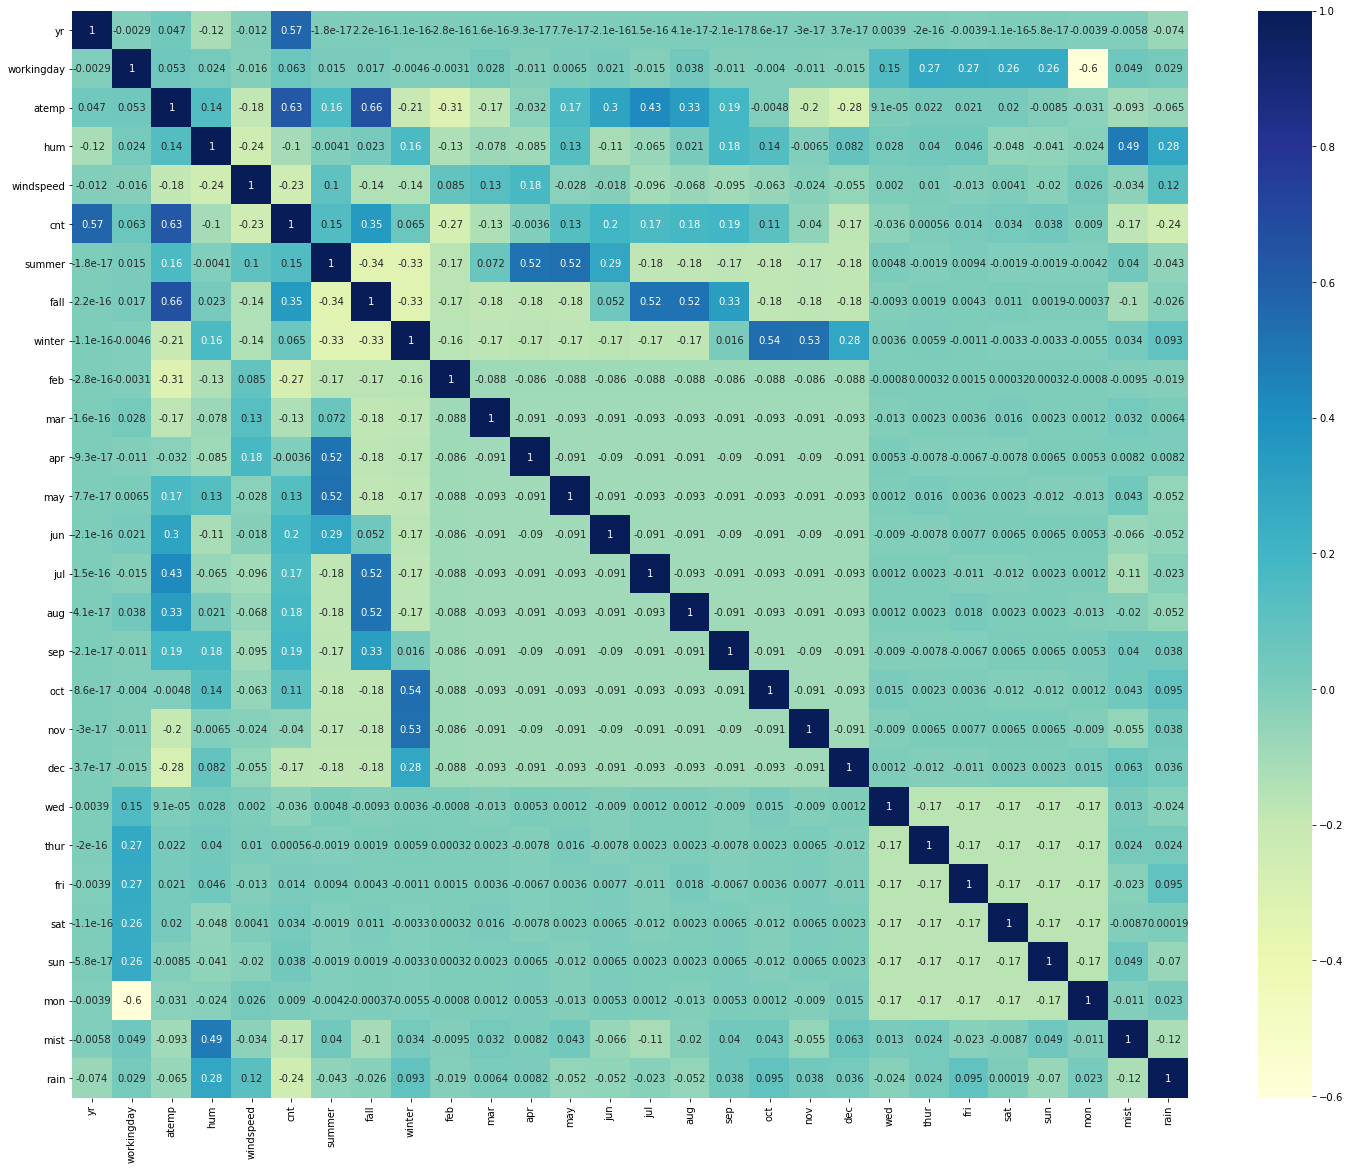

In [46]:
plt.figure(figsize = (25, 20))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [47]:
# Getting correlation values of all variables with 'cnt
cnt_corr = data.corrwith(data['cnt'])
cnt_corr.sort_values(ascending = False)

cnt           1.000000
atemp         0.630685
yr            0.569728
fall          0.345908
jun           0.195568
sep           0.194664
aug           0.182100
jul           0.166236
summer        0.145325
may           0.132553
oct           0.108846
winter        0.064619
workingday    0.062542
sun           0.038403
sat           0.033551
fri           0.014012
mon           0.009012
thur          0.000560
apr          -0.003574
wed          -0.035991
nov          -0.040344
hum          -0.103566
mar          -0.128456
mist         -0.170686
dec          -0.173878
windspeed    -0.234234
rain         -0.240602
feb          -0.273848
dtype: float64

In [48]:
data.columns

Index(['yr', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt', 'summer',
       'fall', 'winter', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug',
       'sep', 'oct', 'nov', 'dec', 'wed', 'thur', 'fri', 'sat', 'sun', 'mon',
       'mist', 'rain'],
      dtype='object')

In [49]:
# Checking correlation between seasons and months, which should be there intuitively
data1 = data[['summer', 'fall',
       'winter','feb', 'mar', 'apr', 'may',
       'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']]

<AxesSubplot:>

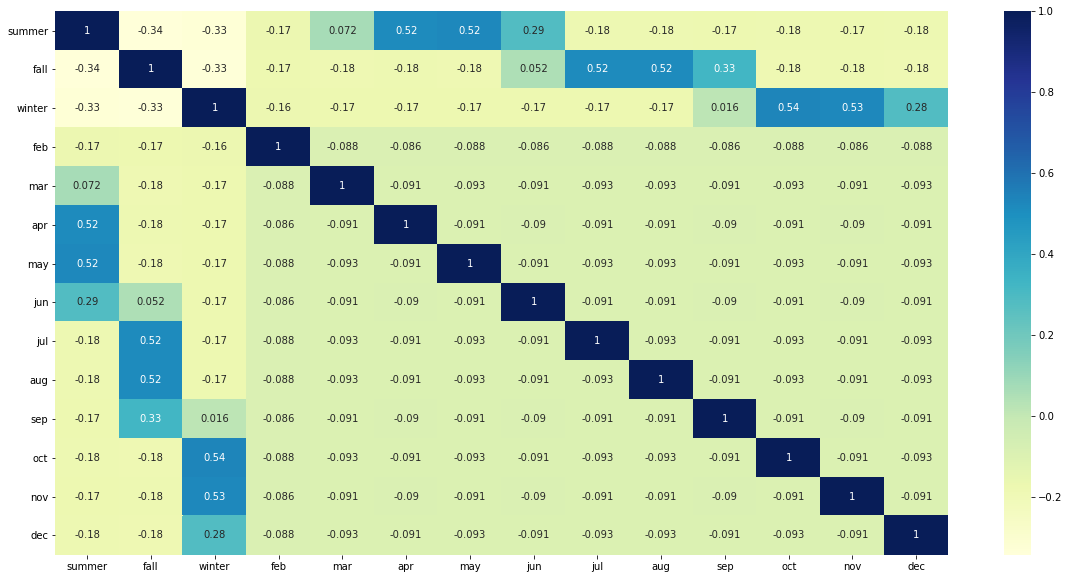

In [50]:
plt.figure(figsize = (20,10))
sns.heatmap(data1.corr(), annot = True, cmap="YlGnBu")

summer: apr, may, jun<br>
fall: jul, aug, sep<br>
winter: oct, nov, dec<br>
spring: jan, feb, mar<br>
Correlations can be seen between months and seasons. This is something we can investigate further with VIF for feature selection.

In [51]:
# Performing the train-test split
np.random.seed(0)
data_train,data_test = train_test_split(data,train_size = 0.8, random_state= 100)

In [52]:
data_train.shape

(584, 28)

In [53]:
data_train.head()

,yr,workingday,atemp,hum,windspeed,cnt,summer,fall,winter,feb,...,nov,dec,wed,thur,fri,sat,sun,mon,mist,rain
367,1,1,6.31375,44.1250,24.499957,2236,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
648,1,1,21.55835,46.3333,12.166932,7570,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
44,0,1,19.91750,37.5833,25.501000,1913,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
705,1,1,16.09790,76.4167,8.750200,5008,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0
379,1,0,8.08125,41.9167,16.834286,2311,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
data_test.shape

(146, 28)

In [55]:
data_test.head()

,yr,workingday,atemp,hum,windspeed,cnt,summer,fall,winter,feb,...,nov,dec,wed,thur,fri,sat,sun,mon,mist,rain
184,0,0,33.27085,63.7917,5.459106,6043,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
535,1,1,36.04875,59.2083,7.625404,6211,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
299,0,1,22.85230,81.2917,13.250121,2659,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
221,0,1,34.24915,42.4167,13.417286,4780,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
152,0,1,32.19710,30.5000,19.583229,4968,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


Scaling of numeric variables is not really required here as all predictor variables are on a similar scale. However, we will perform scaling so that coeffecients that will be learned are not very large.

In [56]:
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the dummy variables
num_vars = ['hum', 'atemp', 'windspeed', 'cnt']

data_train[num_vars] = scaler.fit_transform(data_train[num_vars])

In [57]:
data_train.head()

,yr,workingday,atemp,hum,windspeed,cnt,summer,fall,winter,feb,...,nov,dec,wed,thur,fri,sat,sun,mon,mist,rain
367,1,1,0.061963,0.308520,0.955836,0.254717,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
648,1,1,0.462175,0.337376,0.411731,0.868385,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
44,0,1,0.419099,0.223037,1.000000,0.217556,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
705,1,1,0.318824,0.730486,0.260993,0.573631,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0
379,1,0,0.108365,0.279663,0.617644,0.263346,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
data_train.describe()

,yr,workingday,atemp,hum,windspeed,cnt,summer,fall,winter,feb,...,nov,dec,wed,thur,fri,sat,sun,mon,mist,rain
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.513699,0.667808,0.513175,0.556035,0.437051,0.515792,0.246575,0.251712,0.250000,0.073630,...,0.080479,0.087329,0.148973,0.133562,0.154110,0.135274,0.123288,0.150685,0.342466,0.027397
std,0.500241,0.471403,0.211663,0.181017,0.224815,0.225336,0.431387,0.434369,0.433384,0.261392,...,0.272267,0.282558,0.356367,0.340472,0.361363,0.342309,0.329049,0.358048,0.474941,0.163378
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.331819,0.411425,0.273860,0.350696,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.530558,0.560883,0.405289,0.522837,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.690521,0.685975,0.564300,0.691872,0.000000,1.000000,0.250000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
# Dividing into X and Y sets for the model building
y_train = data_train.pop('cnt')
X_train = data_train

## **MODEL BUILDING**

### Model 1 : Using all parameters, to gain an understanding of significance of all the variables

In [60]:
X_train_lm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params

const         0.133812
yr            0.231012
workingday    0.085214
atemp         0.425406
hum          -0.112441
windspeed    -0.120839
summer        0.096903
fall          0.062862
winter        0.165708
feb           0.030309
mar           0.069132
apr           0.067937
may           0.097216
jun           0.094942
jul           0.049984
aug           0.103930
sep           0.153638
oct           0.080875
nov           0.011883
dec           0.007866
wed          -0.047068
thur         -0.043979
fri          -0.027835
sat          -0.030987
sun          -0.018269
mon           0.060129
mist         -0.059428
rain         -0.256697
dtype: float64

In [61]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     122.7
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          2.67e-214
Time:                        17:10:41   Log-Likelihood:                 608.47
No. Observations:                 584   AIC:                            -1161.
Df Residuals:                     556   BIC:                            -1039.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1338      0.023      5.696      0.0

In [62]:
# Checking VIF for all variables
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,atemp,40.20
1,workingday,28.06
3,hum,15.39
6,fall,14.37
7,winter,10.04
5,summer,9.55
14,aug,9.50
13,jul,8.77
21,fri,8.14
11,may,7.31


Following variables have HIGH p-value as well HIGH VIF and therefore, are insignificant for our model:<br>
'jul', 'nov', all days except 'mon'<br>
We can safely drop these variables.

### Model 2 : Dropping the variables and updating the model

In [63]:
X_train.columns

Index(['yr', 'workingday', 'atemp', 'hum', 'windspeed', 'summer', 'fall',
       'winter', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct',
       'nov', 'dec', 'wed', 'thur', 'fri', 'sat', 'sun', 'mon', 'mist',
       'rain'],
      dtype='object')

In [64]:
X = X_train.drop(['jul','nov', 'wed', 'thur', 'fri', 'sat',
       'sun'],axis = 1)

In [65]:
X_train_lm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params

const         0.129759
yr            0.229837
workingday    0.057009
atemp         0.455240
hum          -0.120741
windspeed    -0.123140
summer        0.107722
fall          0.085511
winter        0.170749
feb           0.024186
mar           0.057938
apr           0.045857
may           0.072541
jun           0.063716
aug           0.065192
sep           0.120385
oct           0.063789
dec          -0.000762
mon           0.066038
mist         -0.057955
rain         -0.251765
dtype: float64

In [66]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     163.9
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          1.56e-219
Time:                        17:10:41   Log-Likelihood:                 602.78
No. Observations:                 584   AIC:                            -1164.
Df Residuals:                     563   BIC:                            -1072.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1298      0.023      5.680      0.0

In [67]:
# Checking VIF for all variables
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,26.30
3,hum,14.56
6,fall,8.84
5,summer,8.15
1,workingday,4.33
4,windspeed,4.15
11,may,4.10
7,winter,4.04
10,apr,3.53
12,jun,2.66


'feb', 'apr', 'dec' have  high p-value. Removing these variables.

### Model 3 : Dropping 'feb','apr','dec' and updating the model 

In [68]:
X.columns

Index(['yr', 'workingday', 'atemp', 'hum', 'windspeed', 'summer', 'fall',
       'winter', 'feb', 'mar', 'apr', 'may', 'jun', 'aug', 'sep', 'oct', 'dec',
       'mon', 'mist', 'rain'],
      dtype='object')

In [69]:
X = X.drop(['feb','apr','dec'],axis=1)

In [70]:
X.columns

Index(['yr', 'workingday', 'atemp', 'hum', 'windspeed', 'summer', 'fall',
       'winter', 'mar', 'may', 'jun', 'aug', 'sep', 'oct', 'mon', 'mist',
       'rain'],
      dtype='object')

In [71]:
X_train_lm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params

const         0.139858
yr            0.229594
workingday    0.057104
atemp         0.464747
hum          -0.127083
windspeed    -0.119413
summer        0.127931
fall          0.075740
winter        0.159161
mar           0.038235
may           0.038530
jun           0.038128
aug           0.059983
sep           0.116875
oct           0.062650
mon           0.065413
mist         -0.057248
rain         -0.250142
dtype: float64

In [72]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     191.9
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          6.59e-222
Time:                        17:10:41   Log-Likelihood:                 600.30
No. Observations:                 584   AIC:                            -1165.
Df Residuals:                     566   BIC:                            -1086.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1399      0.022      6.408      0.0

In [73]:
# Checking VIF for all variables
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,25.22
3,hum,13.57
6,fall,7.90
1,workingday,4.26
5,summer,3.92
4,windspeed,3.85
7,winter,3.24
15,mist,2.35
0,yr,2.05
9,may,2.00


'atemp' has high VIF. Dropping this variable.

### Model 4 : Dropping 'atemp' and updating the model 

In [74]:
X = X.drop(['atemp'],axis=1)

In [75]:
X_train_lm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params

const         0.226031
yr            0.243309
workingday    0.059953
hum          -0.040204
windspeed    -0.124669
summer        0.222212
fall          0.277516
winter        0.211325
mar           0.065535
may           0.101811
jun           0.115047
aug           0.069422
sep           0.123205
oct           0.117691
mon           0.065472
mist         -0.082399
rain         -0.304677
dtype: float64

In [76]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     145.9
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          6.96e-189
Time:                        17:10:41   Log-Likelihood:                 518.81
No. Observations:                 584   AIC:                            -1004.
Df Residuals:                     567   BIC:                            -929.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2260      0.024      9.428      0.0

In [77]:
# Checking VIF for all variables
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,9.78
1,workingday,4.18
3,windspeed,3.71
5,fall,3.53
4,summer,2.97
6,winter,2.87
14,mist,2.17
0,yr,1.96
10,aug,1.90
8,may,1.88


'hum' has both p-value and VIF. Dropping this variable.

### Model 5 : Dropping 'hum' and updating the model 

In [78]:
X = X.drop(['hum'],axis=1)

In [79]:
X.columns

Index(['yr', 'workingday', 'windspeed', 'summer', 'fall', 'winter', 'mar',
       'may', 'jun', 'aug', 'sep', 'oct', 'mon', 'mist', 'rain'],
      dtype='object')

In [80]:
X_train_lm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     155.4
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          1.18e-189
Time:                        17:10:41   Log-Likelihood:                 518.02
No. Observations:                 584   AIC:                            -1004.
Df Residuals:                     568   BIC:                            -934.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2045      0.017     12.344      0.0

In [81]:
# Checking VIF for all variables
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,3.71
2,windspeed,3.45
4,fall,3.13
3,summer,2.85
5,winter,2.39
0,yr,1.94
9,aug,1.90
7,may,1.81
11,oct,1.63
12,mon,1.62


### All variables have VIF < 5 and p-value << 0.05. So we can go ahead with this model

## **RESIDUAL ANALYSIS**

In [82]:
X.columns

Index(['yr', 'workingday', 'windspeed', 'summer', 'fall', 'winter', 'mar',
       'may', 'jun', 'aug', 'sep', 'oct', 'mon', 'mist', 'rain'],
      dtype='object')

In [83]:
y_train_pred = lr.predict(X_train_lm)

In [84]:
res = y_train - y_train_pred

Text(0.5, 0, 'Errors')

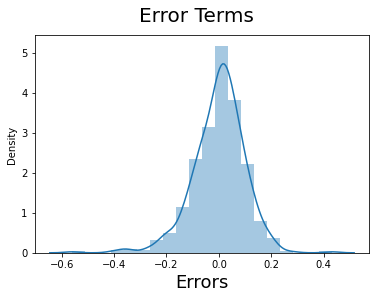

In [85]:
fig = plt.figure()
sns.distplot(res, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)  

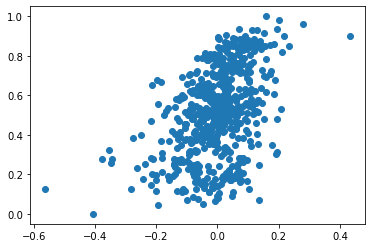

In [86]:
plt.scatter(x= res , y = y_train)

### Error terms are normally distributed and there is no pattern in their spread thereby, validating the assumptions  for a Linear Regression model

## **MAKING PREDICTIONS**

In [87]:
data_test[num_vars] = scaler.transform(data_test[num_vars])

In [88]:
data_test.describe()

,yr,workingday,atemp,hum,windspeed,cnt,summer,fall,winter,feb,...,nov,dec,wed,thur,fri,sat,sun,mon,mist,rain
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.445205,0.746575,0.542752,0.538336,0.432595,0.517368,0.273973,0.280822,0.219178,0.089041,...,0.089041,0.075342,0.123288,0.178082,0.089041,0.171233,0.219178,0.116438,0.315068,0.034247
std,0.498699,0.436469,0.222120,0.198272,0.220142,0.212757,0.447530,0.450948,0.415114,0.285783,...,0.285783,0.264852,0.329899,0.383899,0.285783,0.378009,0.415114,0.321854,0.466142,0.182488
min,0.000000,0.000000,0.025950,0.064052,-0.058859,0.055683,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.346732,0.409656,0.269712,0.391251,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.544652,0.511608,0.421264,0.508916,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.743337,0.658343,0.566449,0.649994,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,0.980934,1.002722,1.000000,0.963300,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [89]:
y_test = data_test.pop('cnt')
X_test = data_test

In [90]:
X_test_lm = sm.add_constant(X_test)

In [91]:
X_test_lm.columns

Index(['const', 'yr', 'workingday', 'atemp', 'hum', 'windspeed', 'summer',
       'fall', 'winter', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug',
       'sep', 'oct', 'nov', 'dec', 'wed', 'thur', 'fri', 'sat', 'sun', 'mon',
       'mist', 'rain'],
      dtype='object')

In [92]:
X_test_lm = X_test_lm.drop([ 'atemp', 'hum', 'feb', 'apr', 'jul','nov', 'dec', 'wed', 'thur', 'fri', 'sat', 'sun'], axis = 1)

In [93]:
y_test_pred = lr.predict(X_test_lm)

## **MODEL EVALUATION**

In [94]:
r_squared = r2_score(y_test,y_test_pred)
r_squared

0.7689241551084817

Text(0, 0.5, 'y_test_pred')

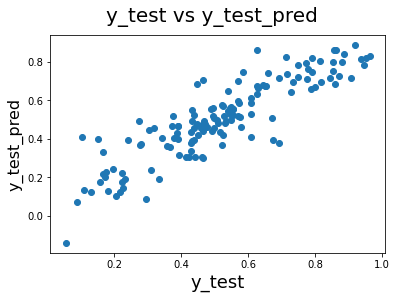

In [95]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                         
plt.ylabel('y_test_pred', fontsize = 16)  

### **FINAL MODEL:**
### cnt = 0.2045 + 0.2445yr + 0.0605workingday - 0.1174windspeed + 0.2215summer + 0.2760fall + 0.2089winter + 0.0656mar + 0.0978may + 0.1155jun + 0.0678aug + 0.1205sep + 0.1162oct + 0.0664mon - 0.0903mist -0.3194rain

**OBSERVATIONS ABOUT VARIABLE 'yr'**:<br>
1.  Though the variable has just two values (2018 & 2019), it has huge impact on the variance explanatory power of the  model. A model built without 'yr' gives a very low r2 score of 0.59 on training set. Therefore, using it for final model.<br>
2.  Distplot of the error terms comes out to be bi-modal for a model built without 'yr'

### **Inferences:**<br>
1. Out of all weather situations, rain has the highest negative influence on demand<br>
2. Year - positive correlation i.e. demand is likely to increase with each year<br>
3. Out of all seasons, 'fall' has the highest positive influence on demand<br>
4. Out of all days, 'monday' has a positive influence on demand<br>
5. Windspeed negatively influences the demand<br>
6. Out of all months, 'september' has the highest positive influence on demand<br>
7. Working day has a positive influence on demand

### **r2 Score**:<br>
On training set - 0.804<br>
On test set - 0.769